In [3]:
include("src/src_file.jl")
using .WolfModule
using Plots
using JLD2
using LsqFit

   Resolving package versions...
  No Changes to `~/miniconda3/share/julia/environments/miniconda3/Project.toml`
  No Changes to `~/miniconda3/share/julia/environments/miniconda3/Manifest.toml`


Firstly, the Wolff algorithm is verified by plotting the susceptibility compared to the susceptibility calculated with the Metropolis algorithm.

In [28]:
temperatures = range(3.41, stop=5.41, length=10) 
J = 1. 
H = 0.
nx = 10
ny = 10
nz = 10
thermalization_steps = 1000
sample_steps = 100000
SweepSteps = 10000

# first simulate using Wolf
T_Wolff, E_Wolff, M_Wolff, susceptibility_Wolff, heatcapacity_Wolff, binderCumulant_Wolff, autocorM_Wolff, autocorE_Wolff, runtimes_Wolff = WolfModule.simulateWolf(temperatures, J, nx, ny, nz, thermalization_steps, sample_steps)

# simulate using Metropolis   
T_Metropolis, E_Metropolis, M_Metropolis, susceptibility_Metropolis, heatcapacity_Metropolis, binderCumulant_Metropolis, autocorM_Metropolis, autocorE_Metropolis, runtimes_Metropolis = WolfModule.simulateIsingMetropolis(temperatures, J, H, SweepSteps, sample_steps, thermalization_steps, nx, ny, nz)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:18
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12
Progress: 100%|█████████████████████████████████████████| Time: 0:00:10
Progress: 100%|█████████████████████████████████████████| Time: 0:00:09
Progress: 100%|█████████████████████████████████████████| Time: 0:00:05
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


(3.41:0.2222222222222222:5.41, Any[-2465.9782602173977, -2290.3486165138347, -2075.857241427586, -1810.0216197838022, -1469.9757402425976, -1062.5825341746583, -860.8985910140899, -771.530244697553, -711.3140468595315, -664.8966710332896], Any[0.8956739032609673, 0.854880751192488, 0.7994826051739482, 0.7195374846251537, 0.5854457255427449, 0.3243395366046342, 0.16711052889471117, 0.11566878331216696, 0.09268065319346813, 0.08005119948800517], Any[0.12497476242035253, 0.19920971386409755, 0.3381514920511107, 0.6574912830880204, 2.1356893220673205, 5.564113664872737, 2.784477763859723, 1.4414413078916533, 0.9175861709011794, 0.6622335856906134], Any[710.1774672884757, 876.6347847412108, 1071.7648624610651, 1329.784336020913, 1778.7336270136457, 1455.168156195462, 537.6136179344196, 315.02956455186285, 236.66743380304078, 193.16095178770982], Any[0.6659648981235748, 0.6653657678267615, 0.6640147051954317, 0.6601190665248627, 0.6391819623608594, 0.4675932193301754, 0.19377215213938603, 0.

Now the simulation results are plottet. It can be seen, that $T_c \approx 4.52$ for both results obtained using Metropolis and Wolff methods.

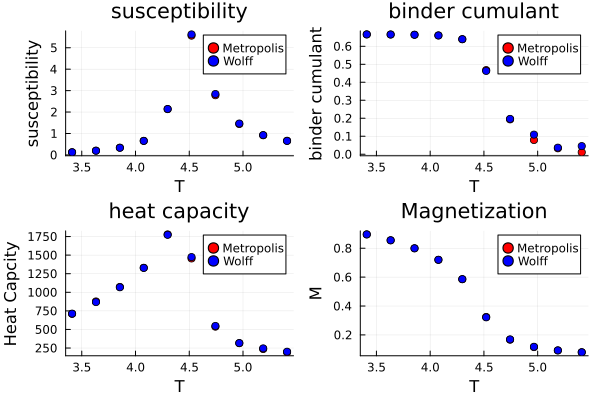

Metropolis: T_c=4.521111111111111Wolff: T_c=4.521111111111111

In [32]:
plot_all = plot(layout=(2, 2))

plot!(plot_all[1], temperatures, susceptibility_Metropolis, xlabel="T", ylabel="susceptibility", seriestype = :scatter, marker = (:circle, :red, 4), label = "Metropolis", title= "susceptibility")
plot!(plot_all[2], temperatures, binderCumulant_Metropolis, xlabel="T", ylabel="binder cumulant", seriestype = :scatter, marker = (:circle, :red, 4), label = "Metropolis", title = "binder cumulant")
plot!(plot_all[3], temperatures, heatcapacity_Metropolis, xlabel="T", ylabel="Heat Capcity", seriestype = :scatter, marker = (:circle, :red, 4), label = "Metropolis", title = "heat capacity")
plot!(plot_all[4], temperatures,  M_Metropolis, xlabel="T", ylabel="M", seriestype = :scatter, marker = (:circle, :red, 4), label = "Metropolis", title = "Magnetization")
  
plot!(plot_all[1], temperatures, susceptibility_Wolff, xlabel="T", ylabel="susceptibility", seriestype = :scatter, marker = (:circle, :blue, 4), label = "Wolff", title= "susceptibility")
plot!(plot_all[2], temperatures, binderCumulant_Wolff, xlabel="T", ylabel="binder cumulant", seriestype = :scatter, marker = (:circle, :blue, 4), label = "Wolff", title = "binder cumulant")
plot!(plot_all[3], temperatures, heatcapacity_Wolff, xlabel="T", ylabel="Heat Capcity", seriestype = :scatter, marker = (:circle, :blue, 4), label = "Wolff", title = "heat capacity")
plot!(plot_all[4], temperatures,  M_Wolff, xlabel="T", ylabel="M", seriestype = :scatter, marker = (:circle, :blue, 4), label = "Wolff", title = "Magnetization")
  
display(plot_all)

println("Metropolis: T_c="*string(temperatures[argmax(susceptibility_Metropolis)]))
println("Wolff: T_c="*string(temperatures[argmax(susceptibility_Wolff)]))


Next the runtimes are calculated and plotted for different System sizes $L=5,\, 10,\, 15$

In [24]:
runtimes_Wolff, runtimes_Metropolis = [], []
temperatures = range(3.41, stop=5.41, length=10)    

sizes = [5,10,15]

for size in sizes
    # first simulate Wolf
    T_list_Wolff, E_liste_Wolff, M_liste_Wolff, susceptibility_Wolff, heatcapacity_Wolff, binderCumulant_Wolff, autocorM_Wolff, autocorE_Wolff, runtime_Wolff = WolfModule.simulateWolf(temperatures, J, size, size, size, thermalization_steps, sample_steps)
    push!(runtimes_Wolff, runtime_Wolff)
    # simulate Metropolis 
    T_list_Metropolis, E_liste_Metropolis, M_liste_Metropolis, susceptibility_Metropolis, heatcapacity_Metropolis, binderCumulant_Metropolis, autocorM_Metropolis, autocorE_Metropolis, runtime_Metropolis = WolfModule.simulateIsingMetropolis(temperatures, J, H, SweepSteps, sample_steps, thermalization_steps, size, size, size)
    push!(runtimes_Metropolis, runtime_Metropolis)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:03
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:02
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:16
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 

[11.648484432, 7.124134523, 10.113009542, 4.105793248, 5.384432939, 4.88639224, 8.360492088, 4.46042535, 6.23422912, 4.747153331]


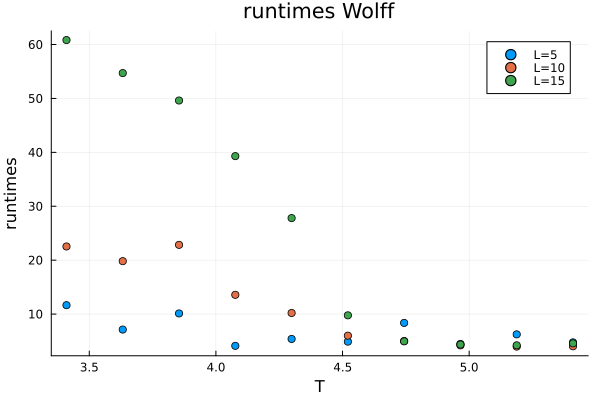

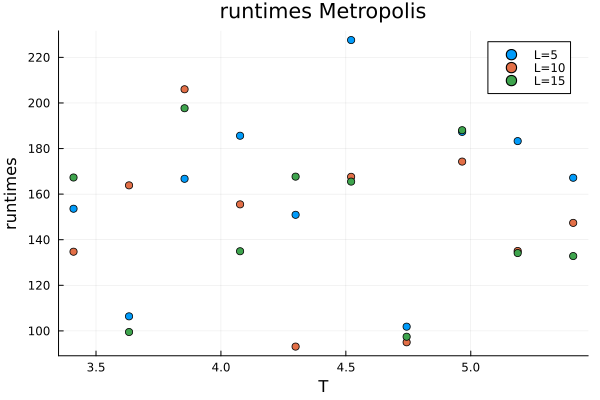

In [25]:
plt_runtimes_Wolff = plot()
plt_runtimes_Metropolis = plot()
println(runtimes_Wolff[1])
for i in 1:length(sizes)
    plot!(plt_runtimes_Wolff, temperatures, runtimes_Wolff[i], label ="L="*string(sizes[i]), seriestype = :scatter, marker = (:circle, 4))   
    plot!(plt_runtimes_Metropolis, temperatures, runtimes_Metropolis[i], label ="L="*string(sizes[i]), seriestype = :scatter, marker = (:circle, 4))   
end
plot!(plt_runtimes_Wolff,title = "runtimes Wolff")
ylabel!(plt_runtimes_Wolff, "runtimes")
xlabel!(plt_runtimes_Wolff, "T")
display(plt_runtimes_Wolff)

plot!(plt_runtimes_Metropolis,title = "runtimes Metropolis")
ylabel!(plt_runtimes_Metropolis, "runtimes")
xlabel!(plt_runtimes_Metropolis, "T")
display(plt_runtimes_Metropolis)

Lastly $\tau$ and MCspeed are calculated

In [ ]:
tau = zeros(10, 2)
ac = cat(autocorM, autocorM_Metropolis, dims=3)
for i in 1:10, j in 1:2
    f(x, p) = (x.*p[1].+p[2])       
    fit = curve_fit(f, collect(1:10), log.(abs.(ac[1:10, i, j])), [1., 1.]) 
    m, b = coef(fit)        
    tau[i, j] = -1/m   
end   
MCspeed_Wolff, MCspeed_Metropolis = zeros(10), zeros(10)
for i in 1:10
    MCspeed_Wolff[i] = 10000 / (runtimes_Wolff[2][i]*tau[i,2])
    MCspeed_Metropolis[i] = 10000 / (runtimes_Metropolis[2][i]*tau[i,1])
end


Now τ and the MC speed are calculated.
First for the Metropolis algorithm.

In [ ]:
using DataFrames

df1 = DataFrame((T=temperatures[1:10], size=10*ones(10), runtime=runtimes_Metropolis[2][1:10], tau=tau[1:10,2], MCspeed=MCspeed_Metropolis[1:10]));
show(stdout, df1, allcols=true)

10×5 DataFrame
 Row │ T        size     runtime  tau       MCspeed 
     │ Float64  Float64  Any      Float64   Float64 
─────┼──────────────────────────────────────────────
   1 │ 3.41        10.0  104.189   1.7253   68.4982
   2 │ 3.63222     10.0  104.94    1.11462  59.7013
   3 │ 3.85444     10.0  109.928   1.29809  78.5802
   4 │ 4.07667     10.0  99.3902   1.99344  41.9434
   5 │ 4.29889     10.0  58.7473   4.80394  40.6732
   6 │ 4.52111     10.0  108.023  22.1545   15.23
   7 │ 4.74333     10.0  58.5284   6.33873  35.2091
   8 │ 4.96556     10.0  109.466   2.83157  18.6872
   9 │ 5.18778     10.0  108.481   1.60956  15.6254
  10 │ 5.41        10.0  108.061   1.22605  12.2743

Now for the Wolff  algorithm.
It can be seen that Wolffs algorithm is much faster than the Metropolis algorithm.

In [ ]:
df2 = DataFrame((T=temperatures[1:10], size=10*ones(10), runtime=runtimes_Wolff[2][1:10], tau=tau[1:10,1], MCspeed=MCspeed_Wolff[1:10]));
show(stdout, df2, allcols=true)

10×5 DataFrame
 Row │ T        size     runtime   tau      MCspeed  
     │ Float64  Float64  Float64   Float64  Float64  
─────┼───────────────────────────────────────────────
   1 │ 3.41        10.0  13.141    1.40119   441.071
   2 │ 3.63222     10.0  12.3483   1.59615   726.549
   3 │ 3.85444     10.0  10.8626   1.15765   709.184
   4 │ 4.07667     10.0   9.13597  2.39879   549.087
   5 │ 4.29889     10.0   6.70244  4.18508   310.577
   6 │ 4.52111     10.0   3.82157  6.07833   118.112
   7 │ 4.74333     10.0   2.43673  4.85265   647.427
   8 │ 4.96556     10.0   2.27146  4.88852  1554.78
   9 │ 5.18778     10.0   2.10925  5.89953  2945.54
  10 │ 5.41        10.0   2.2661   7.53931  3599.25